In [40]:
import pandas as pd
import numpy as np
from math import *
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [41]:
load_data = pd.read_excel("/content/drive/MyDrive/Load Data in kW.xlsx",header = None)
load_data.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [42]:
load_data.describe()

,0
count,2184.000000
mean,6393.230623
std,17139.102597
min,3377.919600
25%,5258.767680
50%,5935.910400
75%,6738.692400
max,805444.430400


In [43]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7feae1120310>],
 'caps': [<matplotlib.lines.Line2D at 0x7feae1137190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feae113b250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feae113b390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feae11340d0>,
  <matplotlib.lines.Line2D at 0x7feae1134910>]}

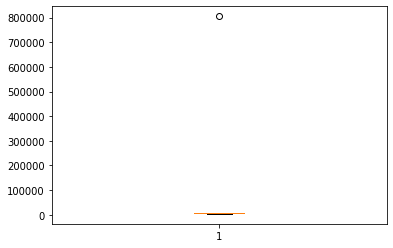

In [44]:
plt.boxplot(load_data.iloc[:,0])

In [45]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([929]),)


In [46]:
load_data.iloc[929,0] = load_data.iloc[928,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7feae10a55d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7feae10aa610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feae10b0650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feae10b0110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feae10a5b50>,
  <matplotlib.lines.Line2D at 0x7feae10aa0d0>]}

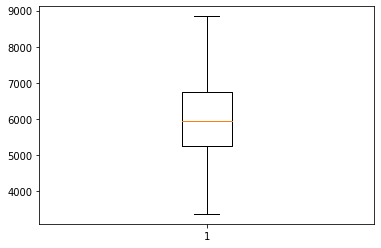

In [47]:
plt.boxplot(load_data.iloc[:,0])

In [48]:
data = minmax_scale(load_data.iloc[:,0])
print(data)

[0.39787738 0.29380046 0.27645431 ... 0.24629825 0.32438447 0.65165045]


In [49]:
x = []
y = []
for i in range(1,len(data)-24):
  temp = [data[i],data[i+23]]
  x.append(temp)
  y.append(data[i+24])

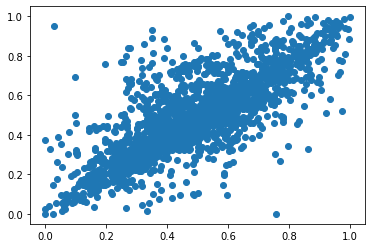

In [50]:
x = np.array(x)
y = np.array(y)

plt.scatter(x[:,[1]],y)

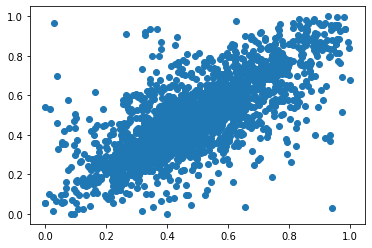

In [51]:
plt.scatter(x[:,[0]],y)

In [52]:
print(x[[1][0]][0])
print(x[[1][0]][1])
print(y[[1]][0])

print(x)
print(y)

0.2764543094348234
0.25579869333257255
0.24450087016062294
[[0.29380046 0.28430002]
 [0.27645431 0.25579869]
 [0.31023366 0.24450087]
 ...
 [0.68414596 0.21779692]
 [0.51467861 0.24629825]
 [0.41730621 0.32438447]]
[0.25579869 0.24450087 0.23996462 ... 0.24629825 0.32438447 0.65165045]


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1727
1727
432
432


In [54]:
def gradientm0(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x0

def gradientm1(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x1

def gradientc(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)

def error(x,y,m0,m1,c):
  number_of_samples = len(x)
  sum = 0
  for i in range(number_of_samples):
    sum = sum + pow((y[[i]][0] - m0*x[[i][0]][0] - m1*x[[i][0]][1] - c), 2)
  error_value = 1*0.5*(1/number_of_samples)*sum
  return error_value

In [55]:
learning_rate = 0.01
epochs = 1000

m0 = 1
m1 = 1
c = 1

Gm0 = 0
Gm1 = 0
Gc = 0
gama = 0.9
e = pow(10,-6)
number_of_samples = len(x_train)
error_list = []

In [56]:
for i in range(epochs):
    for j in range(number_of_samples):
        gradient_m0 = gradientm0(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_m1 = gradientm1(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_c = gradientc(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)

        Gm0 = gama*Gm0 + (1-gama)*gradient_m0**2
        Gm1 = gama*Gm1 + (1-gama)*gradient_m1**2
        Gc = gama*Gc + (1-gama)*gradient_c**2

        learning_rate_m0 = learning_rate/sqrt(Gm0+e)
        learning_rate_m1 = learning_rate/sqrt(Gm1+e)
        learning_rate_c = learning_rate/sqrt(Gc+e)
        
        deltam0 = -1*learning_rate_m0*gradient_m0
        deltam1 = -1*learning_rate_m1*gradient_m1
        deltac = -1*learning_rate_c*gradient_c
        
        m0 = m0 + deltam0
        m1 = m1 + deltam1
        c = c + deltac
    err = error(x,y,m0,m1,c)
    print(err)
    error_list.append(err)

0.008008180680641611
0.008024531110691588
0.008023060959111619
0.008210113246122044
0.008244024897736896
0.00844505422162685
0.008187950526027322
0.00826299089936568
0.008252525436430382
0.0082931145871891
0.008226190292197046
0.008227604262615025
0.008244745406094389
0.008297908819476209
0.008268181934530288
0.008277268329884381
0.008288418523291725
0.008413489378275045
0.008363712346186514
0.008345005922801471
0.008466140061933929
0.00837898586177099
0.008428136126196424
0.008485042639052575
0.008520851224571148
0.008542994980384992
0.008610216935815746
0.008590915294433656
0.008603248942459363
0.008585823457656943
0.008613793226569758
0.008617292340037955
0.008617470218612847
0.008630158591117019
0.008629131482703185
0.008629930400534995
0.008631154306743513
0.008631452287475664
0.008631593434435116
0.00863729467697201
0.008644643426832133
0.008644285755993629
0.008650404622900138
0.00865954417870245
0.008661491301994687
0.008664354393512205
0.008725074583985937
0.008693430244086087

Text(0.5, 1.0, 'error graph in case of SGD with RMS')

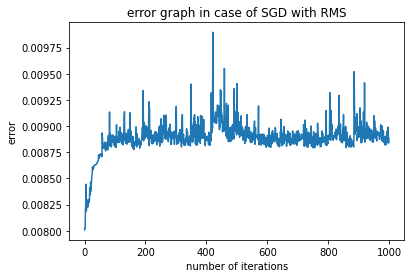

In [57]:
x1 = range(epochs)
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("error graph in case of SGD with RMS")

In [58]:
print(m0,m1,c)

0.788381384784081 -0.024174585026592435 0.10986205944386696


In [59]:
train_error = error(x_train,y_train,m0,m1,c)
test_error = error(x_test,y_test,m0,m1,c)

print("train error : ",train_error)
print("test error : ",test_error)

train error :  0.008667048679675238
test error :  0.009753258687386739


In [60]:
input_load0 = float(input("enter yesterday load at this time : "))
input_load1 = float(input("enter load at previous hour : "))

max_value = 8841.669480
min_value = 3377.919600

input_load0 = (input_load0 - min_value)/(max_value-min_value)
input_load1 = (input_load1 - min_value)/(max_value-min_value)
output_load = input_load0*m0 + input_load1*m0 + c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 5698
enter load at previous hour : 4965
predicted load for this hour is :  7058.511256181058
